In [37]:
import pandas as pd

In [38]:
import numpy as np

In [39]:
import matplotlib.pyplot as plt

# Reading the train data

In [40]:
df = pd.read_csv("train_s3TEQDk.csv")

In [41]:
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [42]:
d = df

In [43]:
d["Gender"] = pd.get_dummies(d["Gender"])

In [44]:
d

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,1,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,1,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,1,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,0,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,1,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,0,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,0,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,1,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,1,28,RG273,Salaried,X1,31,No,407504,No,0


# Frequency Encoding

In [45]:
def freq_enco(d,variable):
    c = d[variable].value_counts().to_dict()
    d[variable] = d[variable].map(c)

In [46]:
freq_enco(d,"Region_Code")
freq_enco(d,"Occupation")
freq_enco(d,"Channel_Code")

In [47]:
d.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [48]:
d["Credit_Product"].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

# Random Sample Imputation

In [49]:
d["Credit_Product"].dropna().sample(d["Credit_Product"].isnull().sum(), random_state = 0).value_counts()

No     19513
Yes     9812
Name: Credit_Product, dtype: int64

In [50]:
def impute_nan(d,variable):
    d[variable+"_random"] = d[variable]
    random_sample = d[variable].dropna().sample(d[variable].isnull().sum(), random_state = 0)
    random_sample.index = d[d[variable].isnull()].index
    d.loc[d[variable].isnull(),variable+"_random"] = random_sample

In [51]:
impute_nan(d,"Credit_Product")

In [52]:
d.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_random
0,NNVBBKZB,1,73,35934,70173,68712,43,No,1045696,No,0,No
1,IDD62UNG,1,30,12826,71999,103718,32,No,581988,No,0,No
2,HD3DSEMC,1,56,35934,100886,68712,26,No,1484315,Yes,0,No
3,BF3NC7KV,0,34,7720,71999,103718,19,No,470454,No,0,No
4,TEASRWXV,1,30,5829,71999,103718,33,No,886787,No,0,No


# Handling Categorical Data

In [53]:
d["Credit_Product_random"] = pd.get_dummies(d["Credit_Product_random"])

In [54]:
d.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_random
0,NNVBBKZB,1,73,35934,70173,68712,43,No,1045696,No,0,1
1,IDD62UNG,1,30,12826,71999,103718,32,No,581988,No,0,1
2,HD3DSEMC,1,56,35934,100886,68712,26,No,1484315,Yes,0,1
3,BF3NC7KV,0,34,7720,71999,103718,19,No,470454,No,0,1
4,TEASRWXV,1,30,5829,71999,103718,33,No,886787,No,0,1


In [55]:
d.drop(["Credit_Product"], axis = 1, inplace = True)

In [56]:
d.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_random
0,NNVBBKZB,1,73,35934,70173,68712,43,1045696,No,0,1
1,IDD62UNG,1,30,12826,71999,103718,32,581988,No,0,1
2,HD3DSEMC,1,56,35934,100886,68712,26,1484315,Yes,0,1
3,BF3NC7KV,0,34,7720,71999,103718,19,470454,No,0,1
4,TEASRWXV,1,30,5829,71999,103718,33,886787,No,0,1


In [57]:
d["Is_Active"] = pd.get_dummies(d["Is_Active"])

In [58]:
d.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Credit_Product_random
0,NNVBBKZB,1,73,35934,70173,68712,43,1045696,1,0,1
1,IDD62UNG,1,30,12826,71999,103718,32,581988,1,0,1
2,HD3DSEMC,1,56,35934,100886,68712,26,1484315,0,0,1
3,BF3NC7KV,0,34,7720,71999,103718,19,470454,1,0,1
4,TEASRWXV,1,30,5829,71999,103718,33,886787,1,0,1


In [59]:
y = d.loc[:,"Is_Lead"]

In [60]:
y

0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

In [61]:
x = d.drop(["ID","Is_Lead"], axis = 1)

In [62]:
x.head(5)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Credit_Product_random
0,1,73,35934,70173,68712,43,1045696,1,1
1,1,30,12826,71999,103718,32,581988,1,1
2,1,56,35934,100886,68712,26,1484315,0,1
3,0,34,7720,71999,103718,19,470454,1,1
4,1,30,5829,71999,103718,33,886787,1,1


# Splitting Data

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
import scipy.stats as stat
import pylab

In [66]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist = "norm", plot = pylab)
    plt.show()

(array([57074., 38733., 20903., 31350., 35289., 27778., 13745.,  8487.,
         6872.,  5494.]),
 array([23. , 29.2, 35.4, 41.6, 47.8, 54. , 60.2, 66.4, 72.6, 78.8, 85. ]),
 <a list of 10 Patch objects>)

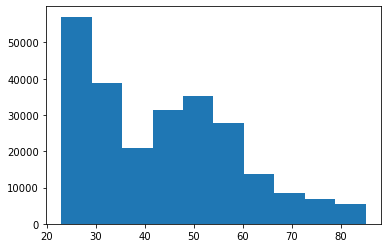

In [67]:
plt.hist(d["Age"])

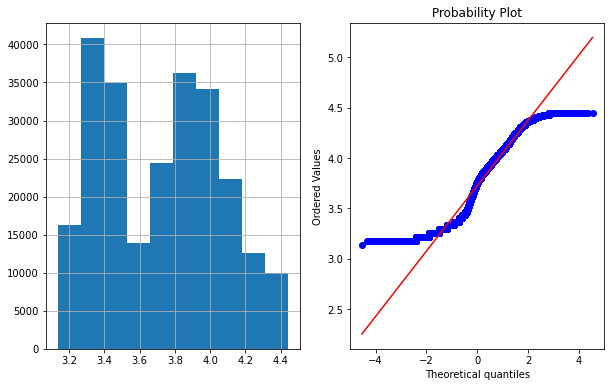

In [68]:
d["Age"] = np.log(d["Age"])
plot_data(d,"Age")

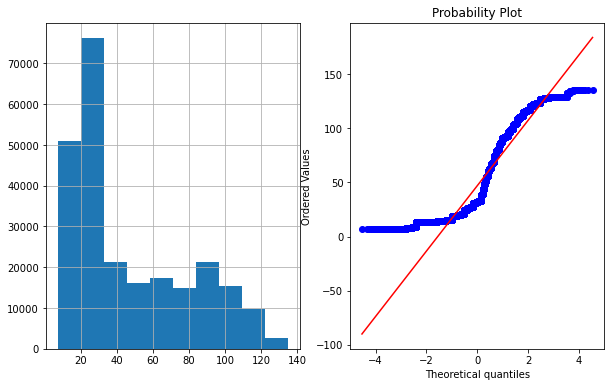

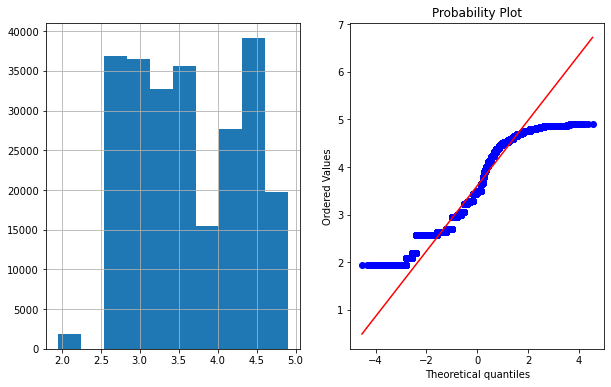

In [69]:
plot_data(d,"Vintage")
d["Vintage"] = np.log(d["Vintage"])
plot_data(d,"Vintage")

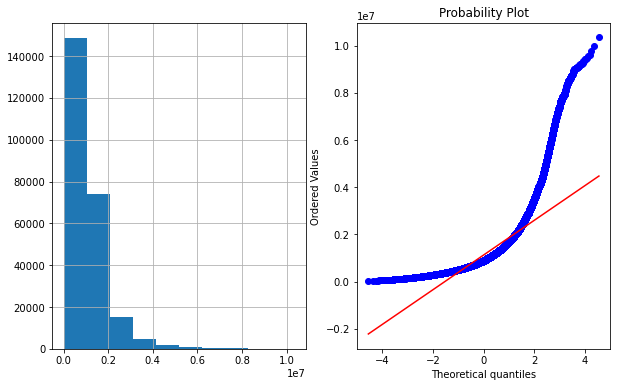

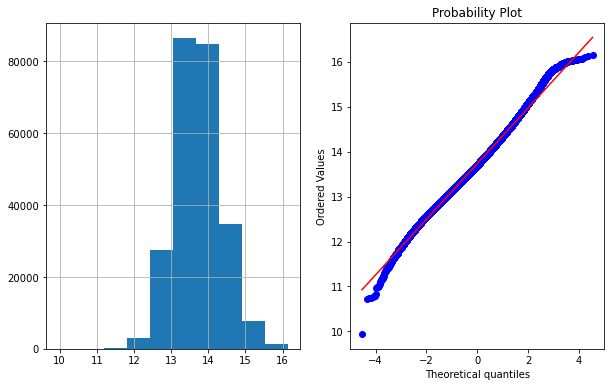

In [70]:
plot_data(d,"Avg_Account_Balance")
d["Avg_Account_Balance"] = np.log(d["Avg_Account_Balance"])
plot_data(d,"Avg_Account_Balance")

# Handling Biased Data

In [71]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [72]:
os = RandomOverSampler(0.5)
x_train_ns, y_train_ns = os.fit_resample(x_train,y_train)
print("Before fit:{}".format(Counter(y_train)))
print("After fit:{}".format(Counter(y_train_ns)))

C:\Users\Jptech\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Before fit:Counter({0: 131198, 1: 40809})
After fit:Counter({0: 131198, 1: 65599})


# Creating and Training Model with the Split Data

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_cla = sc.fit_transform(x_train)
X_test_cla = sc.transform(x_test)

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_cla, y_train)

SVC(kernel='linear', random_state=0)

In [74]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X_train_cla, y_train)

GaussianNB()

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
kclassifier = KNeighborsClassifier(n_neighbors=10,metric = "minkowski", p = 2)

In [80]:
kclassifier.fit(X_train_cla, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
regressor = LogisticRegression()

In [85]:
regressor.fit(x_train,y_train)

LogisticRegression()

# Predicting the test result with Split Data

In [86]:
y_pred = regressor.predict(x_test)

In [81]:
y_pred1 = kclassifier.predict(X_test_cla)

In [89]:
y_pred2 = classifier.predict(X_test_cla)

In [75]:
y_pred3 = classifier2.predict(X_test_cla)

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54951  1288]
 [17075   404]]


0.7509020863289835

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[52335  3904]
 [12604  4875]]


0.7760655470848368

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[56239     0]
 [17479     0]]


0.7628937301608834

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[44556 11683]
 [ 8844  8635]]


0.7215469763151469

# Predicting the Test Dataset results

In [ ]:
test = pd.read_csv("test_mSzZ8RL.csv")

In [ ]:
len(test.columns)

In [ ]:
g = test.drop(["ID"], axis = 1)

In [ ]:
freq_enco(g,"Gender")
freq_enco(g,"Region_Code")
freq_enco(g,"Occupation")
freq_enco(g,"Channel_Code")

In [ ]:
g.isnull().sum()

In [ ]:
impute_nan(g,"Credit_Product")

In [ ]:
g.drop(["Credit_Product"], axis = 1, inplace = True)

In [ ]:
g

In [ ]:
g["Is_Active"] = pd.get_dummies(g["Is_Active"])

In [ ]:
g["Credit_Product_random"] = pd.get_dummies(g["Credit_Product_random"])

In [ ]:
y_pred = regressor.predict(g)

In [ ]:
z = test

In [ ]:
z["Is_Lead"] = y_pred

In [ ]:
z

In [ ]:
data = z.loc[:,["ID","Is_Lead"]]

In [ ]:
data

# Creating a New CSV file

In [ ]:
data.to_csv("submit.csv", index = False)

# Without Splitting the data to train and test and predicting the test dataset results and adding it to file

In [ ]:
model = LogisticRegression()

In [ ]:
x

In [ ]:
y

In [ ]:
pd.DataFrame(y)["Is_Lead"].value_counts()

In [ ]:
model.fit(x,y)

In [ ]:
test.shape

In [ ]:
g.shape

In [ ]:
y_pred2 = model.predict(g)

In [ ]:
len(y_pred2)

In [ ]:
type(y_pred2)

In [ ]:
pd.DataFrame(y_pred2)[0].value_counts()

In [ ]:
data["Is_Lead"].value_counts()

In [ ]:
final = test

In [ ]:
final["Is_Lead"] = y_pred2

In [ ]:
final.shape

In [ ]:
final_data = final.loc[:,["ID", "Is_Lead"]]

In [ ]:
final_data.shape

In [ ]:
final_data.to_csv("final_submit.csv", index = False)